In [1]:
import pickle
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np

#Allows to see up to 500 columns within notebook
pd.set_option('display.max_rows',500)
pd.set_option('display.max_columns',500)
pd.set_option('display.width',1000)



In [2]:
pickle_in = open("df_pickle.pkl","rb")
df = pickle.load(pickle_in)
type(df)

pandas.core.frame.DataFrame

In [3]:
df.head()

,AMT_INCOME_TOTAL,AMT_CREDIT_app_train,AMT_ANNUITY_app_train,AMT_GOODS_PRICE_app_train,DAYS_BIRTH,DAYS_EMPLOYED,DAYS_REGISTRATION,DAYS_ID_PUBLISH,OWN_CAR_AGE,EXT_SOURCE_1,EXT_SOURCE_3,APARTMENTS_AVG,BASEMENTAREA_AVG,YEARS_BEGINEXPLUATATION_AVG,YEARS_BUILD_AVG,COMMONAREA_AVG,ELEVATORS_AVG,ENTRANCES_AVG,FLOORSMAX_AVG,FLOORSMIN_AVG,LANDAREA_AVG,LIVINGAPARTMENTS_AVG,LIVINGAREA_AVG,NONLIVINGAPARTMENTS_AVG,NONLIVINGAREA_AVG,BASEMENTAREA_MODE,YEARS_BEGINEXPLUATATION_MODE,YEARS_BUILD_MODE,COMMONAREA_MODE,ELEVATORS_MODE,ENTRANCES_MODE,FLOORSMAX_MODE,FLOORSMIN_MODE,LANDAREA_MODE,LIVINGAPARTMENTS_MODE,LIVINGAREA_MODE,NONLIVINGAPARTMENTS_MODE,NONLIVINGAREA_MODE,BASEMENTAREA_MEDI,YEARS_BEGINEXPLUATATION_MEDI,YEARS_BUILD_MEDI,COMMONAREA_MEDI,ELEVATORS_MEDI,ENTRANCES_MEDI,FLOORSMAX_MEDI,FLOORSMIN_MEDI,LANDAREA_MEDI,LIVINGAPARTMENTS_MEDI,LIVINGAREA_MEDI,NONLIVINGAPARTMENTS_MEDI,NONLIVINGAREA_MEDI,TOTALAREA_MODE,OBS_30_CNT_SOCIAL_CIRCLE,DEF_30_CNT_SOCIAL_CIRCLE,DEF_60_CNT_SOCIAL_CIRCLE,DAYS_LAST_PHONE_CHANGE,AMT_REQ_CREDIT_BUREAU_HOUR,AMT_REQ_CREDIT_BUREAU_DAY,AMT_REQ_CREDIT_BUREAU_YEAR,AMT_APPLICATION,AMT_CREDIT_prev_app,AMT_DOWN_PAYMENT,AMT_GOODS_PRICE_prev_app,DAYS_FIRST_DRAWING,DAYS_FIRST_DUE,DAYS_LAST_DUE,DAYS_LAST_DUE_1ST_VERSION,DAYS_TERMINATION,FLAG_LAST_APPL_PER_CONTRACT,HOUR_APPR_PROCESS_START_prev_app,NFLAG_INSURED_ON_APPROVAL,NFLAG_LAST_APPL_IN_DAY,RATE_DOWN_PAYMENT,RATE_INTEREST_PRIMARY,SELLERPLACE_AREA,SK_ID_PREV_curr2,WEEKDAY_APPR_PROCESS_START_prev_app,AMT_ANNUITY,AMT_CREDIT_SUM,AMT_CREDIT_SUM_DEBT,AMT_CREDIT_SUM_LIMIT,AMT_CREDIT_SUM_OVERDUE,DAYS_CREDIT_ENDDATE,AMT_INSTALMENT,AMT_PAYMENT,DAYS_ENTRY_PAYMENT,DAYS_INSTALMENT,NUM_INSTALMENT_NUMBER,AMT_INSTAL_PAY_DIFF,NUM_INSTAL_VERSION_NUM_DIFF,DAY_INSTAL_ENTRY_DIFF,TARGET
SK_ID_CURR,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,,
100002,202500.0,406597.5,24700.5,351000.0,-9461,-637,-3648.0,-2120,365423.0,0.083037,0.139376,0.0247,0.0369,0.9722,0.6192,0.0143,0.00,0.0690,0.0833,0.1250,0.0369,0.0202,0.0190,0.0000,0.0000,0.0383,0.9722,0.6341,0.0144,0.0000,0.0690,0.0833,0.1250,0.0377,0.022,0.0198,0.0,0.0,0.0369,0.9722,0.6243,0.0144,0.00,0.0690,0.0833,0.1250,0.0375,0.0205,0.0193,0.0000,0.00,0.0149,2.0,2.0,2.0,-1134.0,0.0,0.0,1.0,365423.0,365423.0,365423.0,365423.0,365423.0,365423.0,365423.0,365423.0,365423.0,365423.0,365423.0,365423.0,365423.0,365423.0,365423.0,365423.0,365423.0,365423.0,365423.0,365423.0,365423.0,365423.0,365423.0,365423.0,365423.000,365423.000,365423.0,365423.0,365423.0,365423.0,365423.0,365423.0,1
100003,270000.0,1293502.5,35698.5,1129500.0,-16765,-1188,-1186.0,-291,365423.0,0.311267,365423.000000,0.0959,0.0529,0.9851,0.7960,0.0605,0.08,0.0345,0.2917,0.3333,0.0130,0.0773,0.0549,0.0039,0.0098,0.0538,0.9851,0.8040,0.0497,0.0806,0.0345,0.2917,0.3333,0.0128,0.079,0.0554,0.0,0.0,0.0529,0.9851,0.7987,0.0608,0.08,0.0345,0.2917,0.3333,0.0132,0.0787,0.0558,0.0039,0.01,0.0714,1.0,0.0,0.0,-828.0,0.0,0.0,0.0,365423.0,365423.0,365423.0,365423.0,365423.0,365423.0,365423.0,365423.0,365423.0,365423.0,365423.0,365423.0,365423.0,365423.0,365423.0,365423.0,365423.0,365423.0,365423.0,365423.0,365423.0,365423.0,365423.0,365423.0,98356.995,98356.995,-690.0,-686.0,2.0,0.0,-1.0,4.0,0
100004,67500.0,135000.0,6750.0,135000.0,-19046,-225,-4260.0,-2531,26.0,365423.000000,0.729567,365423.0000,365423.0000,365423.0000,365423.0000,365423.0000,365423.00,365423.0000,365423.0000,365423.0000,365423.0000,365423.0000,365423.0000,365423.0000,365423.0000,365423.0000,365423.0000,365423.0000,365423.0000,365423.0000,365423.0000,365423.0000,365423.0000,365423.0000,365423.000,365423.0000,365423.0,365423.0,365423.0000,365423.0000,365423.0000,365423.0000,365423.00,365423.0000,365423.0000,365423.0000,365423.0000,365423.0000,365423.0000,365423.0000,365423.00,365423.0000,0.0,0.0,0.0,-815.0,0.0,0.0,0.0,365423.0,365423.0,365423.0,365423.0,365423.0,365423.0,365423.0,365423.0,365423.0,365423.0,365423.0,365423.0,365423.0,365423.0,365423.0,365423.0,365423.0,365423.0,365423.0,3654

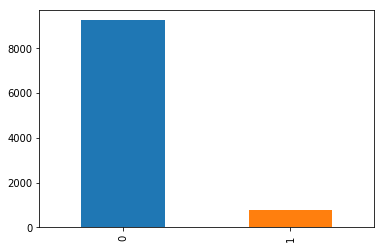

In [4]:
df.TARGET.value_counts().plot(kind='bar')

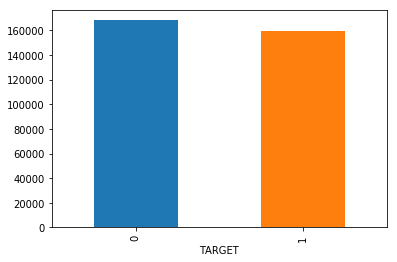

In [14]:
df.groupby('TARGET')['AMT_INCOME_TOTAL'].mean().plot(kind='bar')

(array([3.580e+02, 1.785e+03, 2.775e+03, 1.292e+03, 1.555e+03, 9.630e+02,
        5.120e+02, 2.460e+02, 2.170e+02, 9.800e+01, 2.000e+01, 9.100e+01,
        4.000e+00, 2.700e+01, 6.000e+00, 1.100e+01, 1.000e+00, 1.800e+01,
        5.000e+00, 3.000e+00, 4.000e+00, 0.000e+00, 2.000e+00, 0.000e+00,
        1.000e+00, 0.000e+00, 1.000e+00, 1.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 3.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00, 0.000e+00,
        0.000e+00, 1.000e+00]),
 array([  25650.,   63837.,  102024.,  140211.,  178398.,  216585.,
         254772.,  292959.,  331146.,  369333.,  407520.,  445707.,
         483894.,  522081.,  560268.,  598455.,  636642.,  674829.,
         713016.,  751203.,  789390.,  827577.,  865764.,  903951.,
         942138.,  980325., 1018512., 1056699., 1094886., 1133073.,
        1171260., 1209447., 1247634.

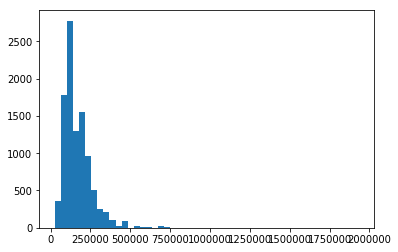

In [19]:
plt.hist(df['AMT_INCOME_TOTAL'][df['AMT_INCOME_TOTAL']<6000000],bins=50)

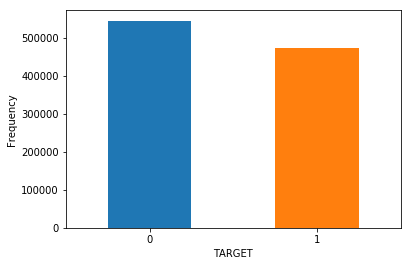

In [10]:
df.groupby('TARGET')['AMT_GOODS_PRICE_app_train'].mean().plot(kind='bar')


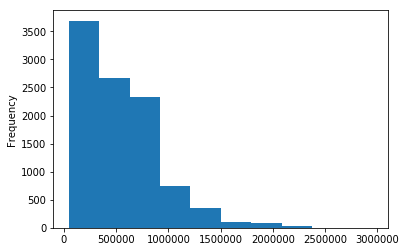

In [13]:
df['AMT_GOODS_PRICE_app_train'].plot(kind='hist')

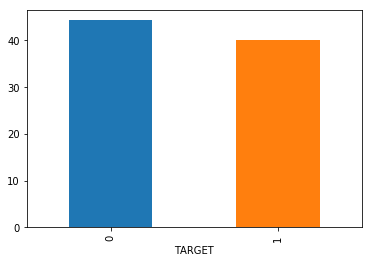

In [7]:
df.DAYS_BIRTH = df.DAYS_BIRTH.apply(lambda x:x/-365)
df.groupby('TARGET')['DAYS_BIRTH'].mean().plot(kind='bar')